<a href="https://colab.research.google.com/github/CaduPortifolio/An-lise/blob/main/Profissao_Cientista_de_Dados_M10_support_material_assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 10 atividade 1

## Importando as bibliotecas

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


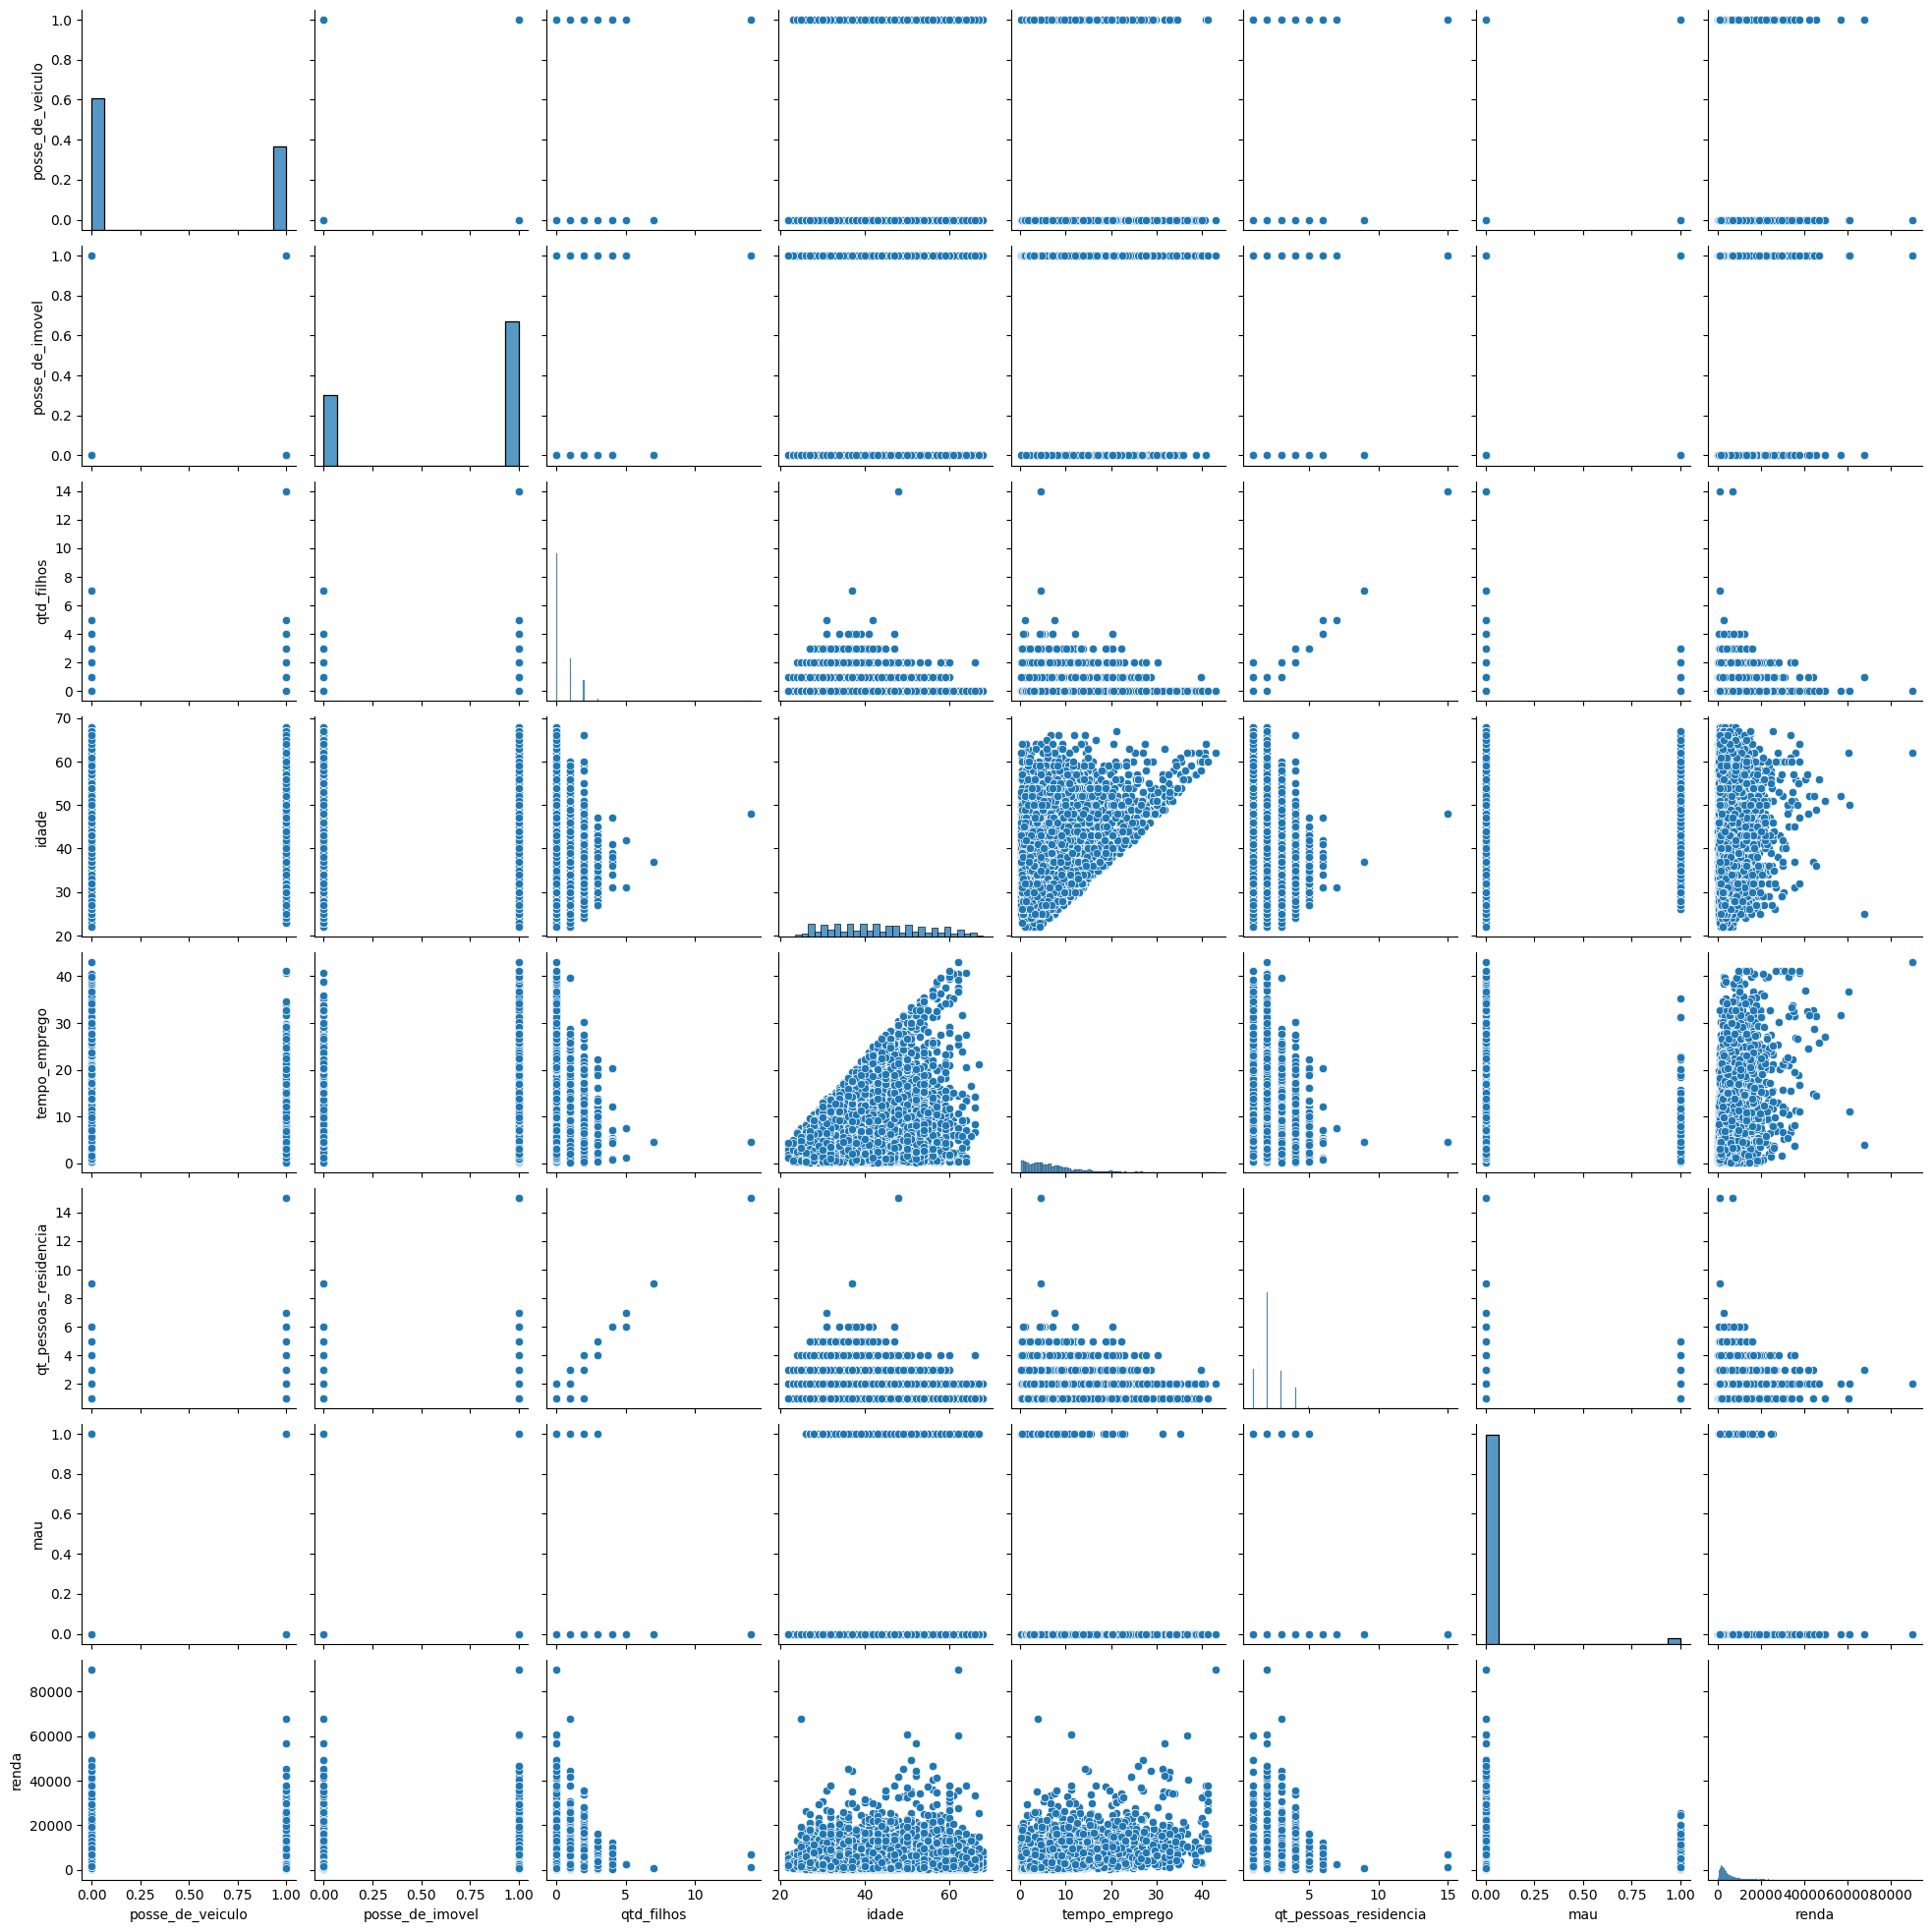

<Figure size 1000x800 with 0 Axes>

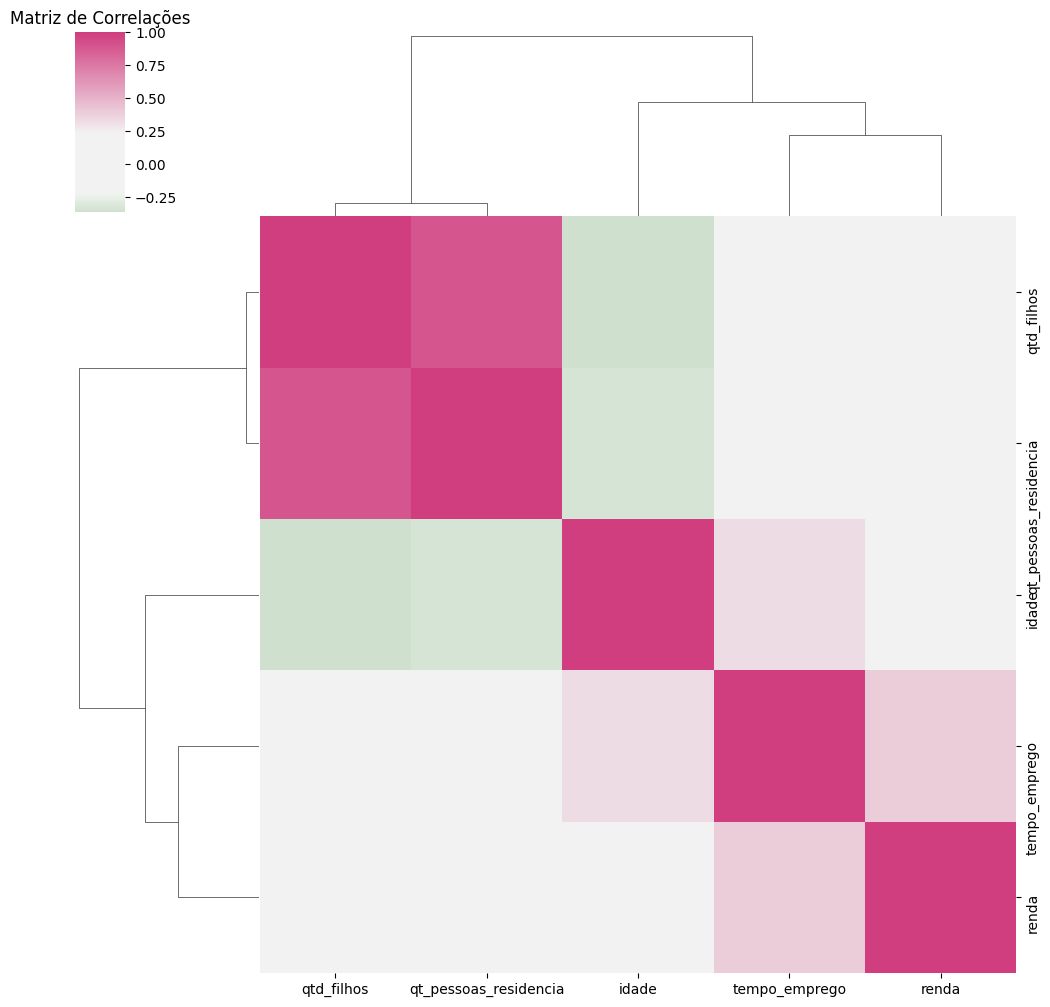

In [14]:
# Carregando arquivo CSV em um dataframe
df = pd.read_csv('previsao_de_renda.csv')

df.drop(columns=['Unnamed: 0', 'index'], inplace=True)

# Exibindo as primeiras linhas do dataframe
display(df.head(5))

# Plotando a matriz de dispersão para avaliação das correlações entre as variáveis
sns.pairplot(df)
plt.show()

# Calculando a matriz de correlações
matriz = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = matriz.corr()

# Plotando a matriz de correlações em um mapa de calor
plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')
sns.clustermap(correlation_matrix, figsize=(10, 10), center = 0, cmap=cmap)
plt.title('Matriz de Correlações')
plt.show()

#Resposta:



> Acredito estar deixando passar algo, mas para mim, nenhuma das correlações fazem sentido segundo estes dados, tanto nos gráficos de dispersão, quanto no mapa de calor, pois as correlações mais fortes que são apresentadas [qtd_filhos + qtd_pessoas_residencia] o que é óbvio, mais filhos, mais pessoas, e [idade + tempo_emprego] obviamente se você trabalha e fica mais velho, você aumenta consequentemente o tempo no emprego. A única correlação minimamente diferente e positiva, porém de forma bem fraca, é a [renda + tempo_emprego] com 0.39, as demais informações para mim, não fizeram muito sentido.



2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

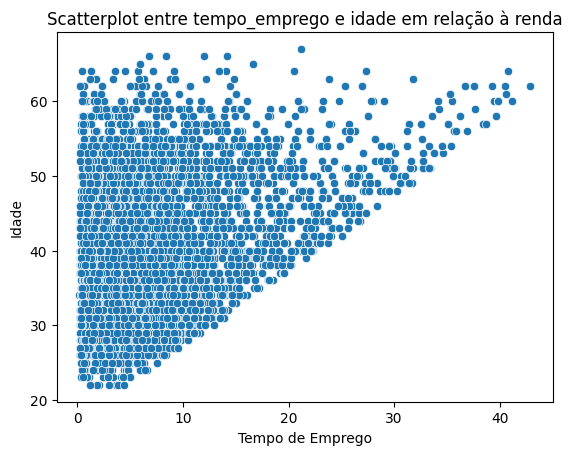

In [11]:
# Identificar as duas variáveis mais correlacionadas com "renda"
correlation_with_renda = correlation_matrix['renda'].sort_values(ascending=False)
top_2_correlated_vars = correlation_with_renda.index[1:3]

# Plotar o scatterplot das duas variáveis mais correlacionadas com "renda"
sns.scatterplot(x=top_2_correlated_vars[0], y=top_2_correlated_vars[1], data=df)
plt.xlabel('Tempo de Emprego')
plt.ylabel('Idade')
plt.title(f"Scatterplot entre {top_2_correlated_vars[0]} e {top_2_correlated_vars[1]} em relação à renda")
plt.show()

3) Na su aopinião, há outliers na variável renda?

In [6]:
# Calculando estatísticas descritivas da variável "renda"
desc_stats = df['renda'].describe()

# Exibindo as estatísticas descritivas
print(desc_stats)

count    15000.000000
mean      4624.632946
std       4628.571729
min        159.900000
25%       1945.740000
50%       3278.260000
75%       5642.365000
max      89918.040000
Name: renda, dtype: float64


# Resposta


> Sim. É possível identificar observando os gráficos relacionados a variável renda e também após utilizar um calculo de média, mediana, desvio padrão e quartis é possível ter noção dos valores que demonstram o valor mínimo como 159 que é muito inferior aos valores encontrados no restante dos dados e o valor máximo de 89918 que é muito acima dos valores encontrados no restante dos dados.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

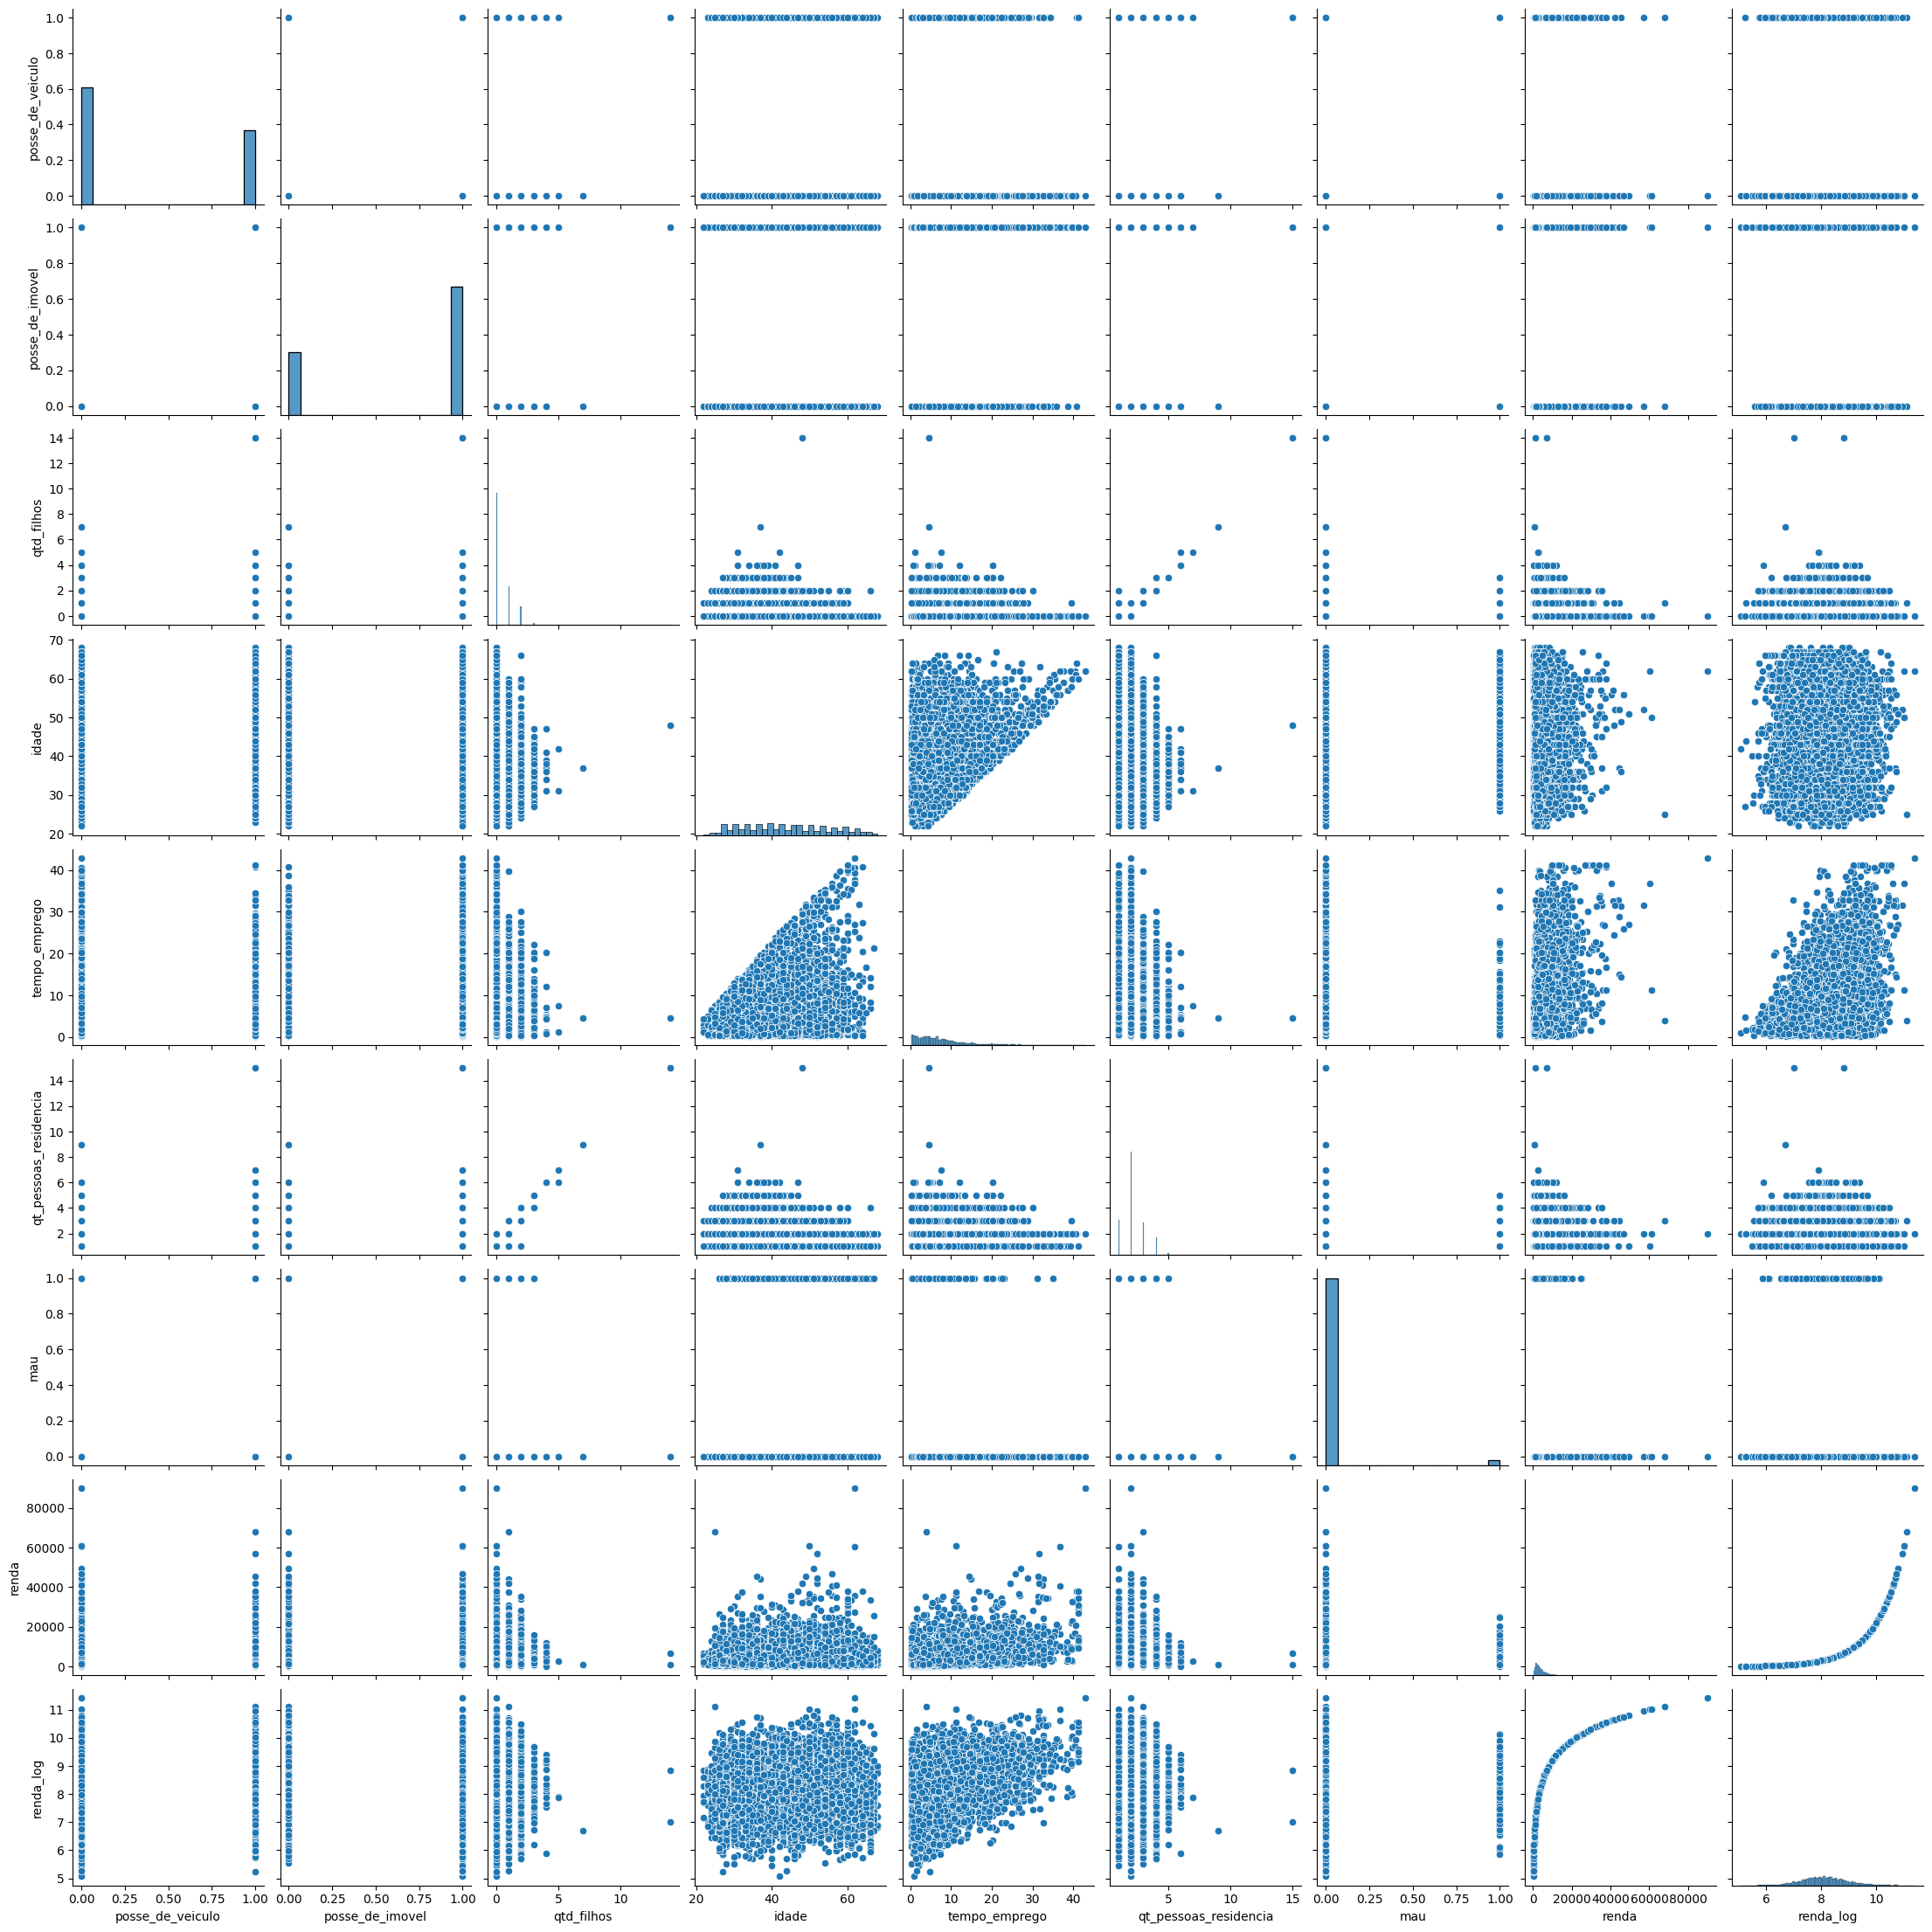

<Figure size 1000x800 with 0 Axes>

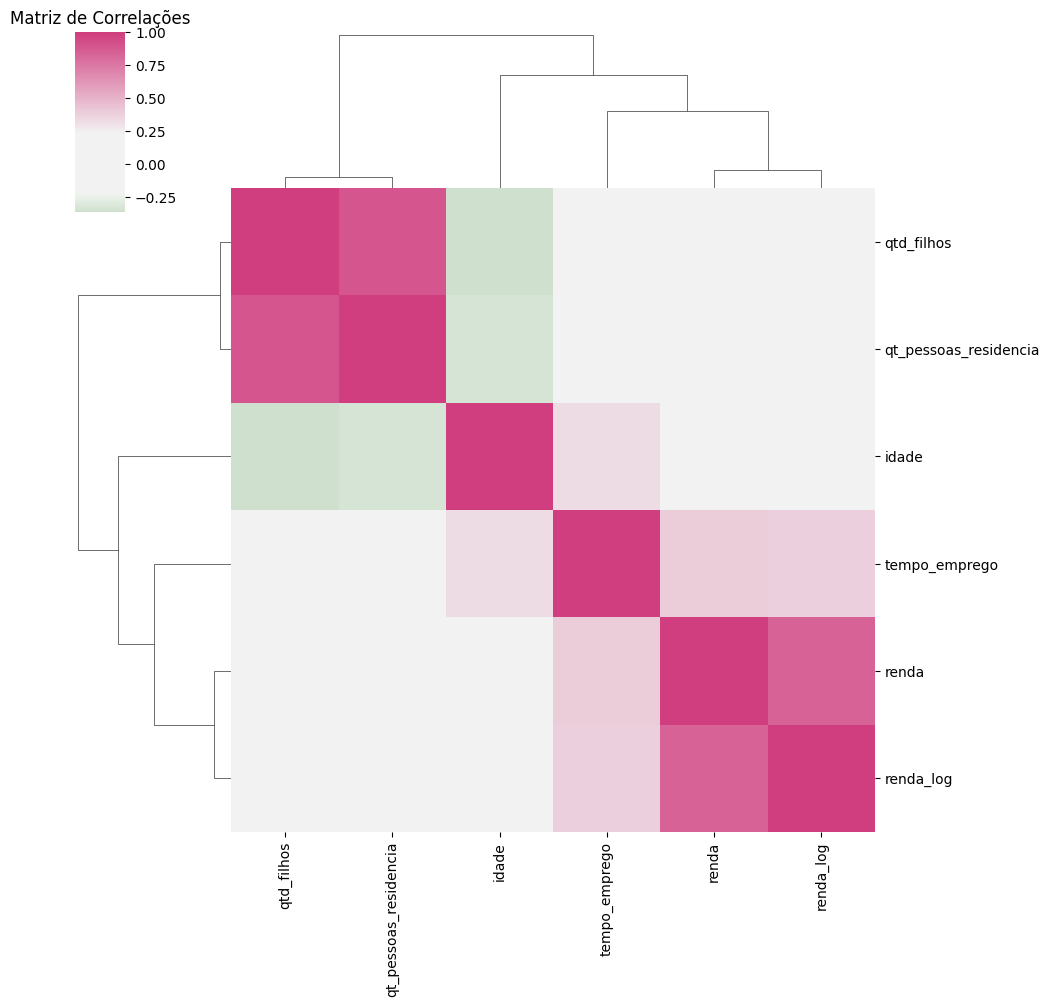

In [15]:
# Calcule o logaritmo da variável "renda"
df['renda_log'] = df['renda'].apply(lambda x: None if x <= 0 else round(math.log(x), 2))

# Verifique se as colunas a serem removidas existem
cols_to_drop = ['Unnamed: 0', 'index']
existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]

# Remova as colunas existentes
df.drop(columns=existing_cols_to_drop, inplace=True)

# Avaliando a estrutura de correlação das variáveis quantitativas através de um gráfico de matriz de dispersão
sns.pairplot(df)
plt.show()

# Calculando a matriz de correlações
correlation_matrix_2 = df.select_dtypes(include=['float64', 'int64']).corr()

# Plotando a matriz de correlações em um mapa de calor
plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')
sns.clustermap(correlation_matrix_2, figsize=(10, 10), center = 0, cmap=cmap)
#sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', fmt=".2f") # uma opção alternativa do mapa de calor
plt.title('Matriz de Correlações')
plt.show()


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

O Mapa de Calor continua com poucas modificações, mas sem dúvidas alguns dos gráficos estão mais aptos a serem interpretados, como por exemplo [tempo_emprego + renda_log]